# Regresión Lineal en Python

En este notebook vamos a aprender a implementar regresiones utilizando Scikit-Learn en Python.
Para esto vamos a utilizar un dataset compuesto por características de distintos vinos. La idea es predecir la calidad del vino en base a diferentes factores. La calidad se determina por un puntaje de 0 a 10. El dataset puede encontrarse en este [link](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009).

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [2]:
dataset = pd.read_csv('../datasets/calidad_vino.csv')

In [3]:
dataset.shape

(1599, 12)

In [4]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Analizamos la correlación de las variables de a pares

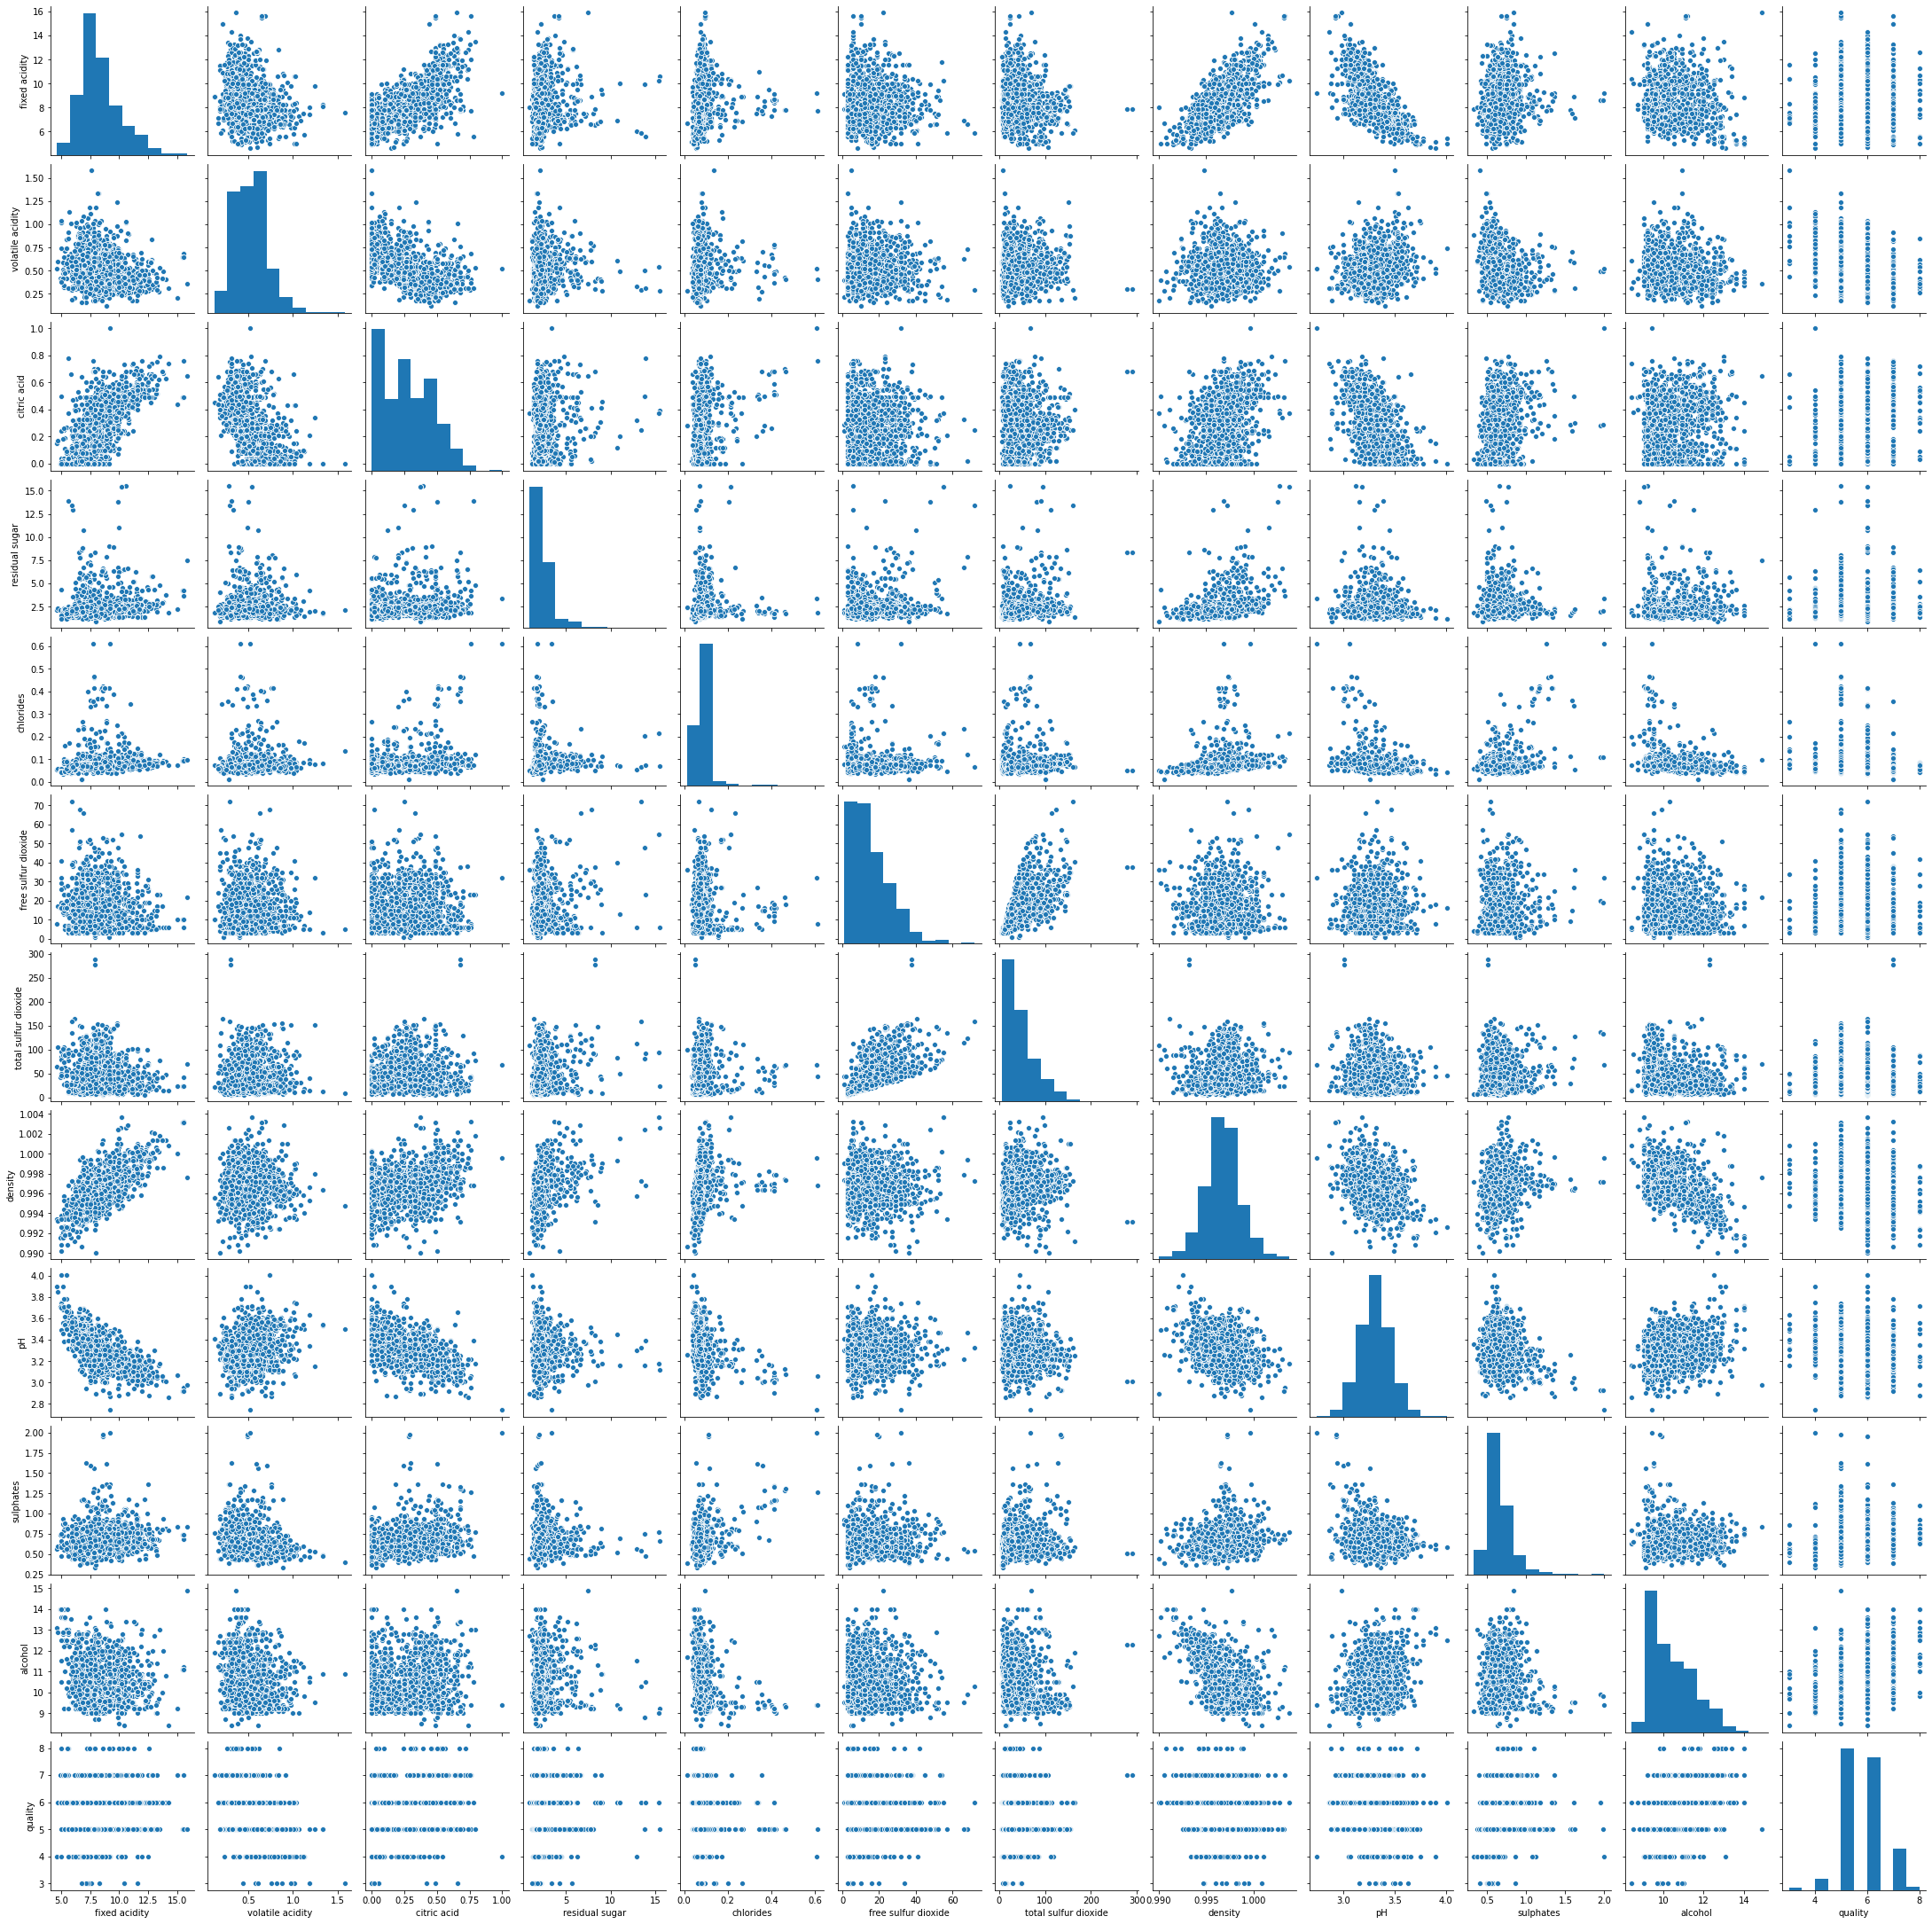

In [6]:
seabornInstance.pairplot(dataset)

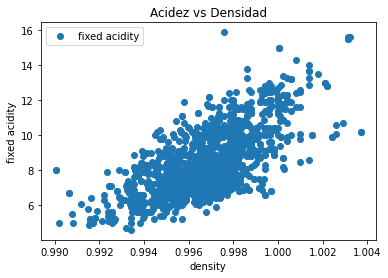

In [7]:
dataset.plot(x='density', y='fixed acidity', style='o')  
plt.title('Acidez vs Densidad')  
plt.xlabel('density')  
plt.ylabel('fixed acidity')  
plt.show()

<AxesSubplot:xlabel='density'>

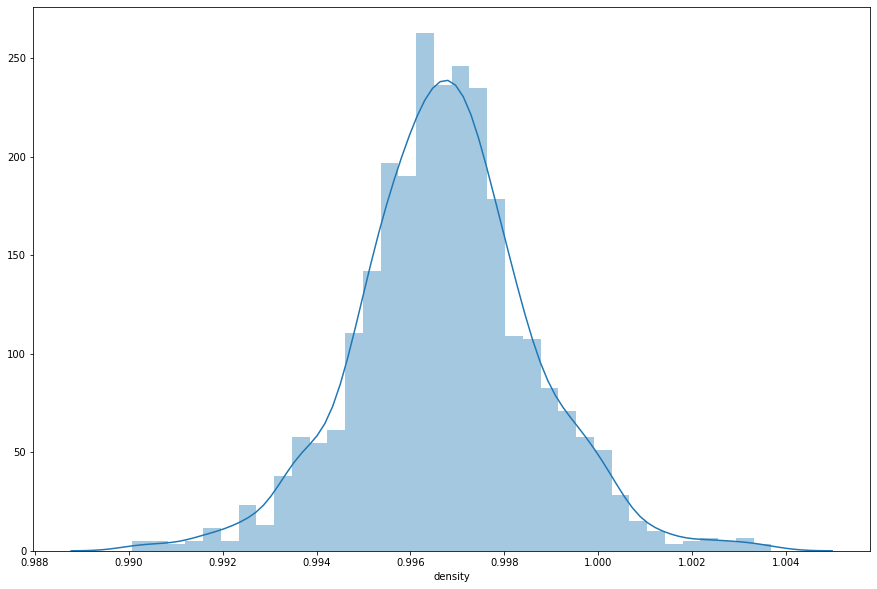

In [8]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['density'])

Determinamos los _atributos_ y los _labels_. Los atributos son las variables independientes, mientras que los labels son las variables que queremos determinar.
Como queremos determinar el Ataque Especial en base a la Defensa Especial, el Ataque es nuestra variable X y la Defensa es nuestro label Y.

#### Y = AX + B

In [9]:
X = dataset['density'].values.reshape(-1,1)
Y = dataset['fixed acidity'].values.reshape(-1,1)

In [10]:
regressor = LinearRegression()  
regressor.fit(X, Y) #Entrenamos el algoritmo

LinearRegression()

La regresión lineal nos determina el valor de los parámetros **A** y **B**. **A** representa la pendiente de la recta y **B** la ordenada al origen.

In [11]:
#Imprimimos el valor de A
print(regressor.coef_)

[[616.28450984]]


In [12]:
#Imprimimos el valor de B
print(regressor.intercept_)

[-605.95990133]


#### Significado de los coeficientes estimados

Teóricamente, el valor de la <b>ordenada al origen</b>, es decir, 29.30889242 es el valor de Ataque Especial de un pokemon con Defensa Especial cero, por lo que su interpretación individual no tiene sentido. La <b>pendiente</b> de la recta estimada es 0.59224608, es decir, que por cada aumento de un punto en la tasa de Defensa Especial, el Ataque Especial sube 0.59 puntos <b>en promedio</b>.

#### Predicciones

Ahora que entrenamos el algoritmo, es hora de realizar nuestra predicción

In [13]:
Y_pred = regressor.predict(X)

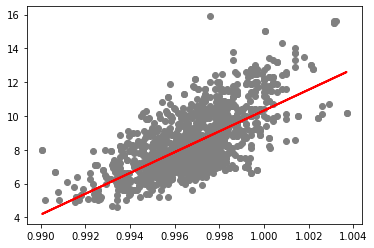

In [14]:
plt.scatter(X, Y,  color='gray')
plt.plot(X, Y_pred, color='red', linewidth=2)
plt.show()

### Errores

Calculamos el error del modelo.

1) Error Cuadrático Medio (Mean Squared Error)

In [15]:
dataset = pd.DataFrame({'Actual': Y.flatten(), 'Predicted': Y_pred.flatten()})
dataset

,Actual,Predicted
0,7.4,8.968783
1,7.8,8.352498
2,7.8,8.475755
3,11.2,9.092039
4,7.4,8.968783
...,...,...
1594,6.2,7.181558
1595,5.9,7.317140
1596,6.3,7.699236
1597,5.9,7.532840


In [16]:
print("MSE: " + str(metrics.mean_squared_error(Y, Y_pred, squared=True)))

MSE: 1.6774843637798658


In [17]:
print("RMSE: " + str(metrics.mean_squared_error(Y, Y_pred, squared=False)))

RMSE: 1.2951773483889633


### Gráfico de Residuos vs Predichos

<AxesSubplot:xlabel='Predicciones', ylabel='Residuos'>

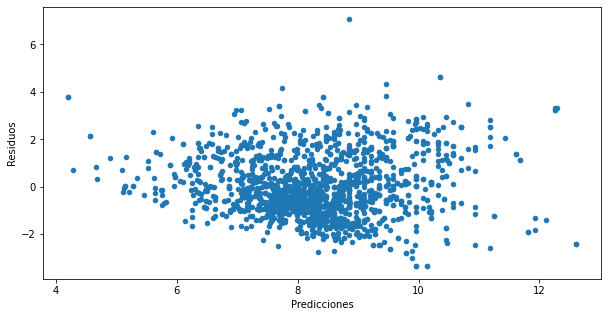

In [18]:
plt.rcParams['figure.figsize'] = (10, 5)

preds = pd.DataFrame({"Predicciones":Y_pred.flatten(), "true":Y.flatten()})
preds["Residuos"] = preds["true"]- preds["Predicciones"]
preds.plot(x = "Predicciones", y = "Residuos",kind = "scatter")

### Regresión Lineal Múltiple


In [19]:
dataset = pd.read_csv('../datasets/calidad_vino.csv')

In [20]:
dataset.shape

(1599, 12)

In [21]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [22]:
#Dividimos los datos en atributos y labels
X_dataset = dataset[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']]
X = dataset[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates','alcohol']].values
y = dataset['quality'].values

Separamos nuestros datos en set de entrenamiento (80%) y set de test (20%).

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Entrenamos el modelo.

In [24]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression()

Como en este caso tenemos múltiples variables, la regresión debe encontrar los coeficientes óptimos para cada atributo.

In [25]:
#Visualizamos los coeficientes determinados por nuestro modelo
coeff_df = pd.DataFrame(regressor.coef_, X_dataset.columns, columns=['Coeficiente'])  
coeff_df

,Coeficiente
fixed acidity,0.041284
volatile acidity,-1.149528
citric acid,-0.177927
residual sugar,0.027870
chlorides,-1.873407
free sulfur dioxide,0.002684
total sulfur dioxide,-0.002777
density,-31.516666
pH,-0.254486
sulphates,0.924040


Estos resultados nos indican, por ejemplo, que al incrementar 1 unidad de densidad (density) se disminuye en 31.52 unidades la calidad del vino.

In [26]:
#Ahora realizamos nuestra predicción de calidad del vino
y_pred = regressor.predict(X_test)

In [27]:
#Observamos la diferencia entre lo predicho y los valores reales
df = pd.DataFrame({'Actual': y_test, 'Predicción': y_pred})
df1 = df.head(25)
df1

,Actual,Predicción
0,6,5.782930
1,5,5.036193
2,7,6.596989
3,6,5.339126
4,5,5.939529
5,6,5.007207
6,5,5.396162
7,6,6.052112
8,4,4.867603
9,5,4.950676


In [28]:
#Analizamos el error de nuestro modelo
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE: 0.3844711978201226
RMSE: 0.6200574149384254


### Gráfico de Residuos vs Predichos

<AxesSubplot:xlabel='Predicciones', ylabel='Residuos'>

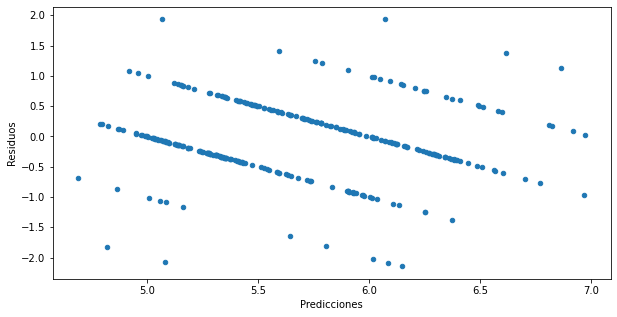

In [29]:
plt.rcParams['figure.figsize'] = (10, 5)

preds = pd.DataFrame({"Predicciones":y_pred, "true":y_test})
preds["Residuos"] = preds["true"]- preds["Predicciones"]
preds.plot(x = "Predicciones", y = "Residuos",kind = "scatter")

### Regresión Polinomial

Lo que primero debemos hacer es crear nuestras nuevas variables polinomiales. Vamos a regresar a nuestro dataset de Pokemon, en este caso como sólo tenemos una variable explicativa (sp_defense) crearemos X_2 = sp_defense<sup>2</sup>

In [30]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)

df = pd.read_csv('../datasets/calidad_vino.csv')
df = df.sort_values(by=['density'])
x_poly = polynomial_features.fit_transform(df['density'].values.reshape(-1, 1))

x_poly

array([[1.        , 0.99007   , 0.9802386 ],
       [1.        , 0.99007   , 0.9802386 ],
       [1.        , 0.9902    , 0.98049604],
       ...,
       [1.        , 1.0032    , 1.00641024],
       [1.        , 1.00369   , 1.00739362],
       [1.        , 1.00369   , 1.00739362]])

Ahora volvemos a entrenar nuestro modelo lineal pero utilizando esta nueva variable

In [31]:
polymodel = LinearRegression()
polymodel.fit(x_poly, df['fixed acidity'].values.reshape(-1, 1))

LinearRegression()

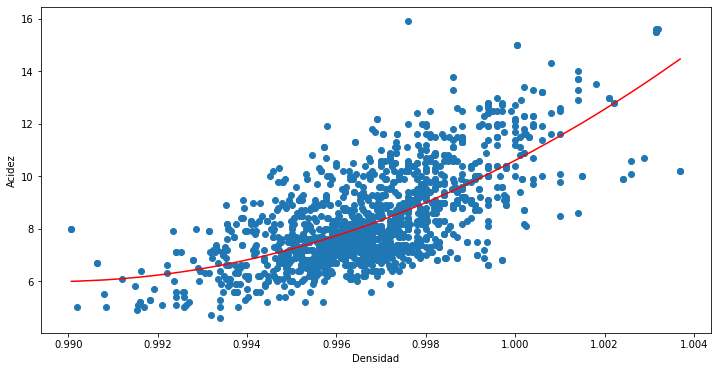

In [35]:
density_pred = polymodel.predict(x_poly)
fig = plt.figure(figsize=(12,6))
plt.scatter(df['density'], df['fixed acidity'])
plt.plot(df['density'],density_pred , color='red')
plt.xlabel('Densidad')
plt.ylabel('Acidez');
plt.show()

Ahora analicemos qué error tenemos en este caso.

In [36]:
print("MSE: "+str(metrics.mean_squared_error(df['fixed acidity'], density_pred, squared=True)))

MSE: 1.609772570758684


In [38]:
print("RMSE: "+str(metrics.mean_squared_error(df['fixed acidity'], density_pred, squared=False)))

RMSE: 1.2687681312039187


El error decreció, lo cual es bueno, veamos ahora el grafico de residuos para analizar si los supuestos se ajustan mejor

<AxesSubplot:xlabel='Predicciones', ylabel='Residuos'>

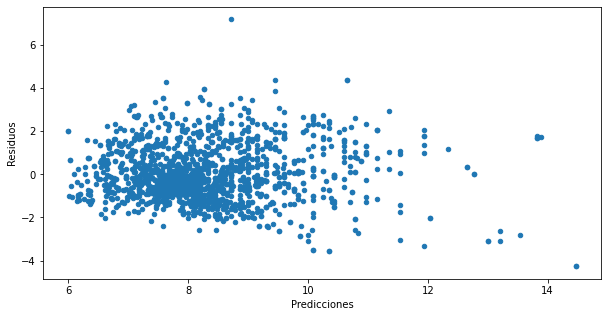

In [39]:
plt.rcParams['figure.figsize'] = (10, 5)

preds = pd.DataFrame({"Predicciones":density_pred.reshape(1599), "true":df['fixed acidity']})
preds["Residuos"] = preds["true"] - preds["Predicciones"]
preds.plot(x = "Predicciones", y = "Residuos",kind = "scatter")

Ahora probamos con un polinomio de grado 3

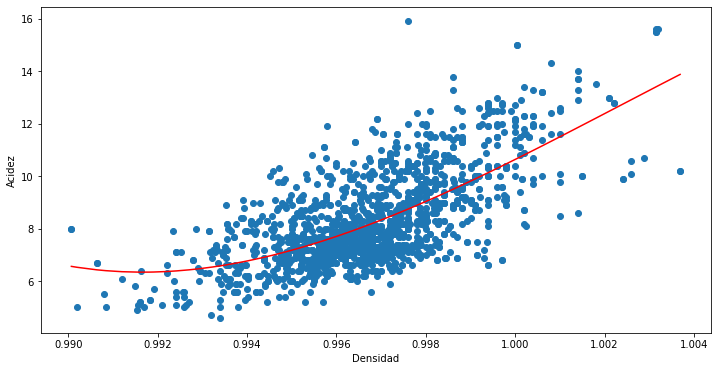

In [40]:
polynomial_features= PolynomialFeatures(degree=3)

df = df.sort_values(by=['density'])
x_poly_3 = polynomial_features.fit_transform(df['density'].values.reshape(-1, 1))
polymodel_3 = LinearRegression()
polymodel_3.fit(x_poly_3, df['fixed acidity'].values.reshape(-1, 1))
life_pred=polymodel_3.predict(x_poly_3)
fig= plt.figure(figsize=(12,6))
plt.scatter(df['density'], df['fixed acidity'])
plt.plot(df['density'],life_pred , color='red')
plt.xlabel('Densidad')
plt.ylabel('Acidez');
plt.show()

#### ¿Que sucede si aumentamos mucho el grado del polinomio?

Recordemos que para tener medidas realistas de nuestros modelos es necesario, evaluar el error sobre <b>datos no usados en el entrenamiento</b>. 

Así que utilizaremos de nuevo k-fold cross validation, para lograr medidas mas realistas de cada tipo de regresión.


In [41]:
def rmse_cv(model,X_train,y_train):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse.mean())

In [44]:
from sklearn.model_selection import cross_val_score
errors = []
for i in range(1,11):
    polynomial_features= PolynomialFeatures(degree=i)    
    x_poly = polynomial_features.fit_transform(df['fixed acidity'].values.reshape(-1, 1))
    y = df['density'].values.reshape(-1, 1)
    regressions = LinearRegression()    
    errors.append(rmse_cv(regressions,x_poly,y))

<AxesSubplot:xlabel='grado'>

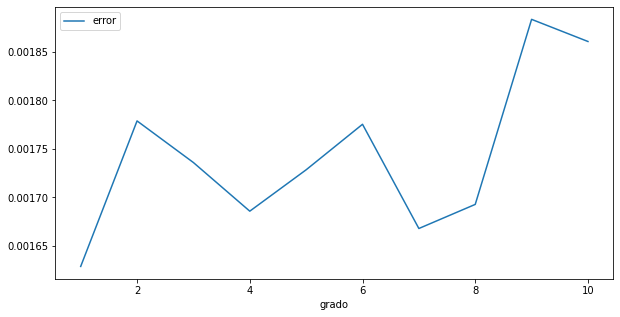

In [45]:
errores = pd.DataFrame({"grado":range(1,11), "error":errors[0:10]})
errores.plot(x = "grado", y = "error")

In [46]:
errors

[0.0016287606867828974,
 0.001778781693026579,
 0.0017358740104120962,
 0.0016857471682919663,
 0.0017283971309471693,
 0.0017753135694029167,
 0.0016678811346569921,
 0.0016927219702479348,
 0.0018834869182303509,
 0.0018606653336429037]